## linear regression

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


In [6]:
filename = 'epa-sea-level.csv'
df = pd.read_csv(filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [88]:
cond = (df['Year']>=2000)

slope1, intercept1, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
slope2, intercept2, r_value, p_value, std_err = linregress(df[cond]['Year'], df[cond]['CSIRO Adjusted Sea Level'])

print('slope-all: {:1.2f}, intercept-all: {:1.2f}'.format(slope1, intercept1))
print('slope->2000: {:1.2f}, intercept->2000: {:1.2f}'.format(slope2, intercept2))

slope-all: 0.06, intercept-all: -119.07
slope->2000: 0.17, intercept->2000: -325.79


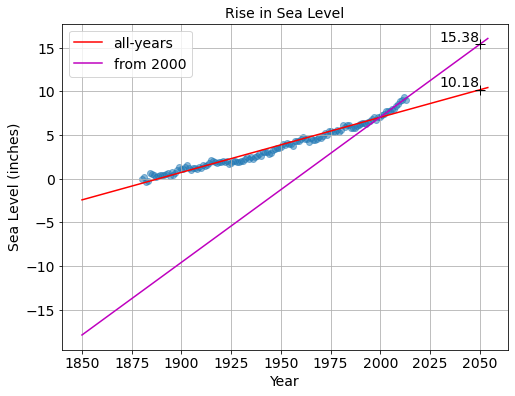

In [105]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level', fontsize=14)

x = np.arange(1850, 2055)
y1 = intercept1 + slope1*x
y2 = intercept2 + slope2*x


idx = np.where(x==2050)[0][0]

line1 = plt.plot(x, y1, 'r-', linewidth=1.5, label='all-years')
plt.plot(x[idx], y1[idx], 'k+', markersize=10)
plt.text(x[idx], y1[idx], '{:1.2f}'.format(y1[idx]), horizontalalignment='right', verticalalignment='bottom')

line2 = plt.plot(x, y2, 'm-', linewidth=1.5, label='from 2000')
plt.plot(x[idx], y2[idx], 'k+', markersize=10)
plt.text(x[idx], y2[idx], '{:1.2f}'.format(y2[idx]), horizontalalignment='right', verticalalignment='bottom')

plt.legend()
plt.grid(True)

<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

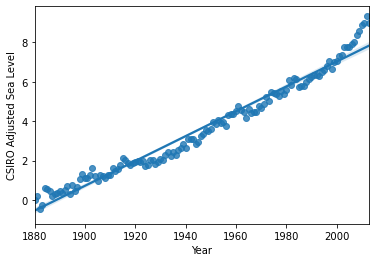

In [9]:
sns.regplot(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], fit_reg=True)